Importing Dependencies

In [19]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,  
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score
)

warnings.filterwarnings("ignore")

Loading The Dataset

In [9]:
X_train = np.load('../artifacts/X_train.npz')['arr_0']
Y_train = np.load('../artifacts/Y_train.npz')['arr_0']
X_test = np.load('../artifacts/X_test.npz')['arr_0']
Y_test = np.load('../artifacts/Y_test.npz')['arr_0']

In [10]:
X_train[0]

array([-0.66627552,  0.34135195, -1.22584767,  1.37378358,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ,  2.        ,
        1.        ,  1.        ,  2.        ])

In [15]:
lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

lr.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Inference

In [ ]:
Y_hat_train = lr.predict(X_train)
Y_hat_test = lr.predict(X_test)

Y_proba_train = lr.predict_proba(X_train)
Y_proba_test = lr.predict_proba(X_test)

In [18]:
Y_proba_train

array([[0.92245057, 0.07754943],
       [0.63387041, 0.36612959],
       [0.75731627, 0.24268373],
       ...,
       [0.27187517, 0.72812483],
       [0.43438308, 0.56561692],
       [0.5888025 , 0.4111975 ]], shape=(12712, 2))

Evaluation

In [20]:
accuracy = accuracy_score(Y_test, Y_hat_test)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(Y_test, Y_hat_test)
print(f"Precision: {precision:.4f}")

recall = recall_score(Y_test, Y_hat_test)
print(f"Recall: {recall:.4f}")

f1 = f1_score(Y_test, Y_hat_test)
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7200
Precision: 0.3759
Recall: 0.6438
F1 Score: 0.4747


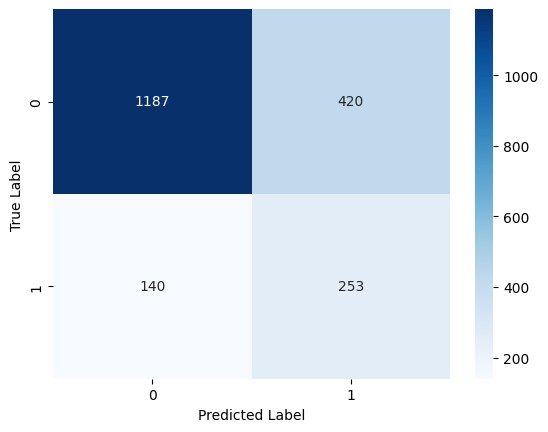

In [25]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()